In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import istft, stft, spectrogram
%matplotlib notebook

### STFT

In [8]:
_, _, fft = stft(sig, window='boxcar', noverlap=4, nperseg=8,boundary=None)

NameError: name 'sig' is not defined

In [197]:
fft

array([[ 3.125     +0.j        ,  2.875     +0.j        ,
         3.75      +0.j        ],
       [ 0.21338835-0.24371843j, -0.1982233 -0.21966991j,
        -0.76516504+0.10983496j],
       [-0.75      +0.625j     , -0.125     +1.j        ,
         1.125     +0.875j     ],
       [ 0.03661165-0.99371843j, -0.5517767 +1.28033009j,
        -0.23483496-0.64016504j],
       [-0.125     +0.j        , -0.125     +0.j        ,
         0.        +0.j        ]])

<IPython.core.display.Javascript object>


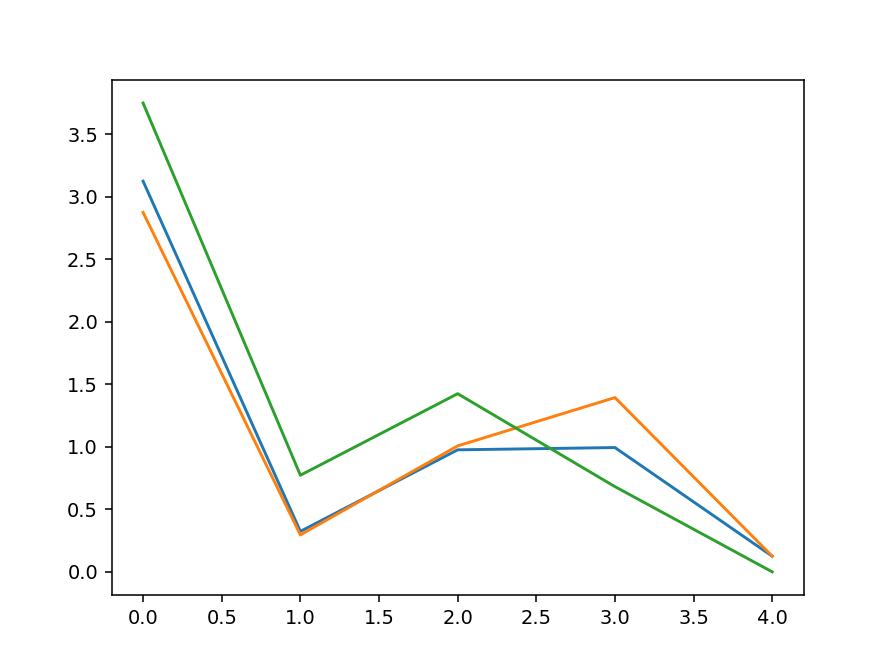

In [198]:
plt.plot(np.abs(fft));

In [205]:
_, sig2=istft(fft, window='boxcar', noverlap=4, nperseg=8,boundary=None)

In [206]:
sig2

array([2.00000000e+00, 4.00000000e+00, 3.00000000e+00, 6.00000000e+00,
       1.00000000e+00, 5.55111512e-17, 6.00000000e+00, 3.00000000e+00,
       4.00000000e+00, 2.00000000e+00, 0.00000000e+00, 7.00000000e+00,
       8.00000000e+00, 2.00000000e+00, 3.00000000e+00, 4.00000000e+00])

In [207]:
sig

array([2, 4, 3, 6, 1, 0, 6, 3, 4, 2, 0, 7, 8, 2, 3, 4])

In [208]:
sig-sig2

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -5.55111512e-17,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

## spectrogram

In [2]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

<IPython.core.display.Javascript object>


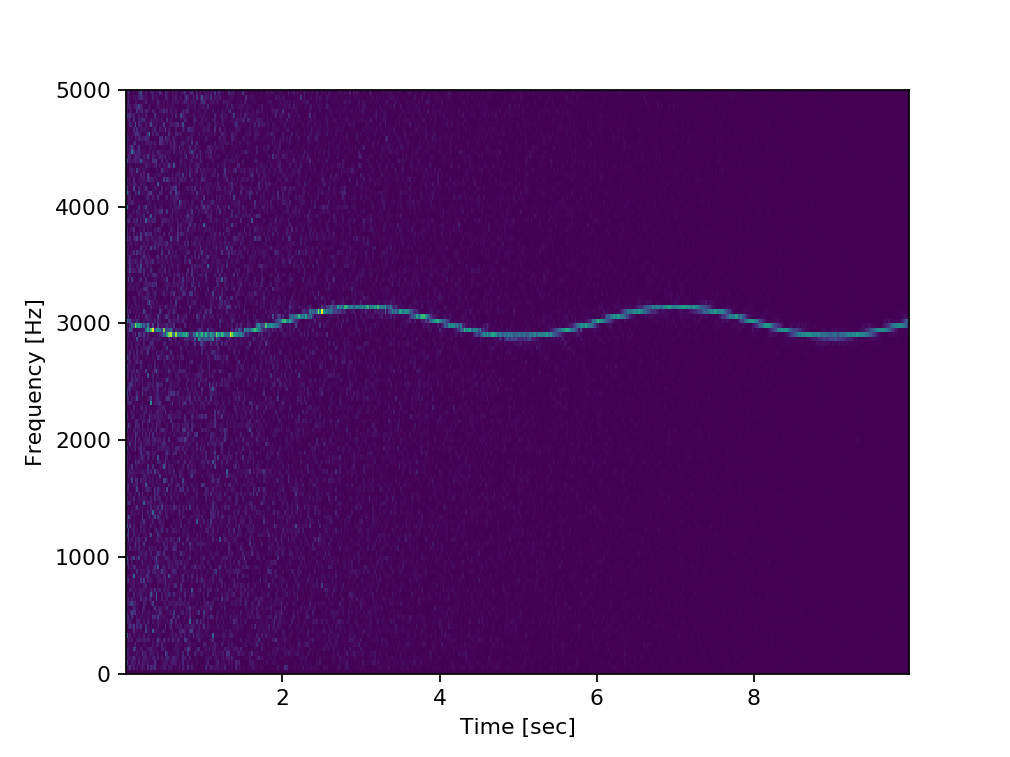

In [10]:
f, t, Sxx = spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

<IPython.core.display.Javascript object>


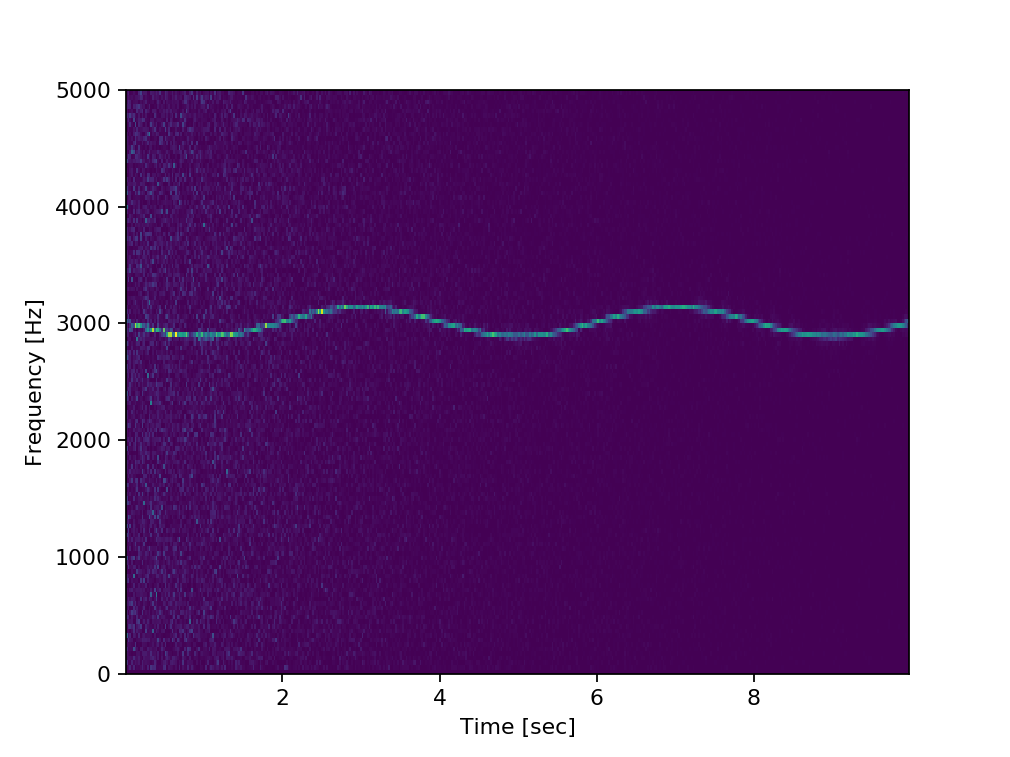

In [86]:
f, t, Sxx = scipy.signal.spectrogram(x, fs,window='boxcar')
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

<IPython.core.display.Javascript object>


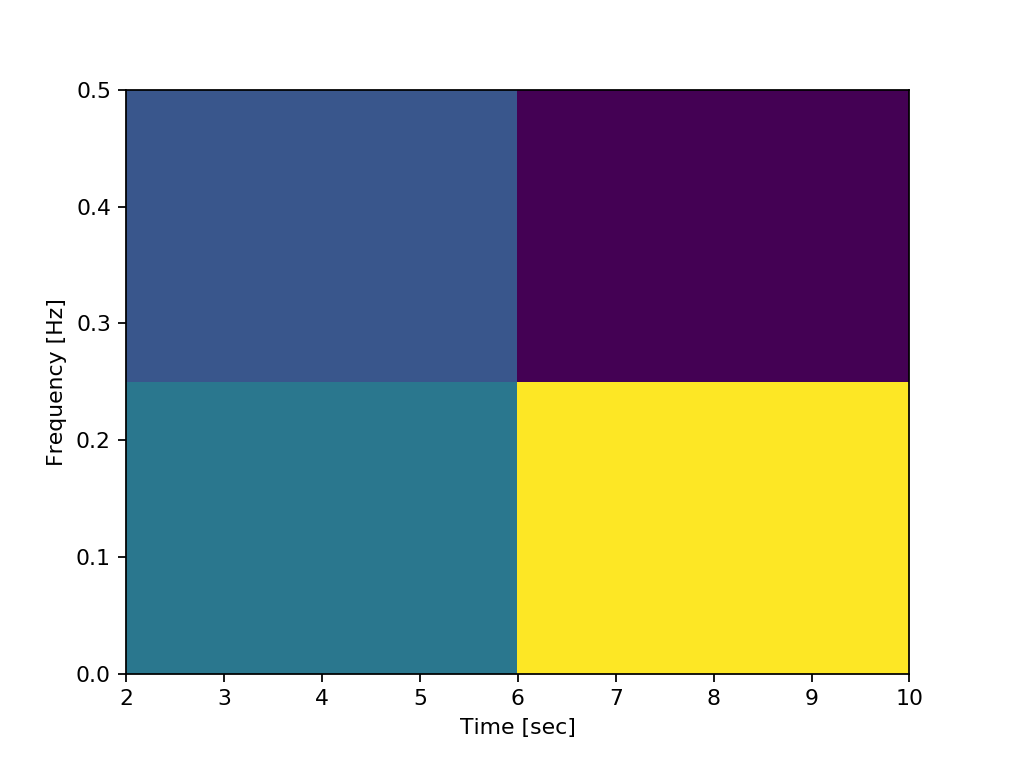

Text(0.5,0,'Time [sec]')

In [83]:
f, t, Sxx = spectrogram(np.random.randint(0,10,12),window='boxcar',nperseg=4,detrend=False)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [84]:
Sxx

array([[ 56.25, 110.25,  25.  ],
       [ 44.5 ,  20.5 ,  34.  ],
       [  6.25,  12.25,   9.  ]])

In [14]:
dirName = 'data/training2017/'
xTrain = np.load(dirName + 'train.npy')
yTrain = np.load(dirName + 'trainlabel.npy')
yTrain=yTrain[:,1]

In [16]:
df=pd.DataFrame(yTrain)

In [20]:
df[0].value_counts()

N    6811
A     988
~     295
Name: 0, dtype: int64

In [19]:
df[0].head()

0    N
1    N
2    N
3    N
4    N
Name: 0, dtype: object

<IPython.core.display.Javascript object>


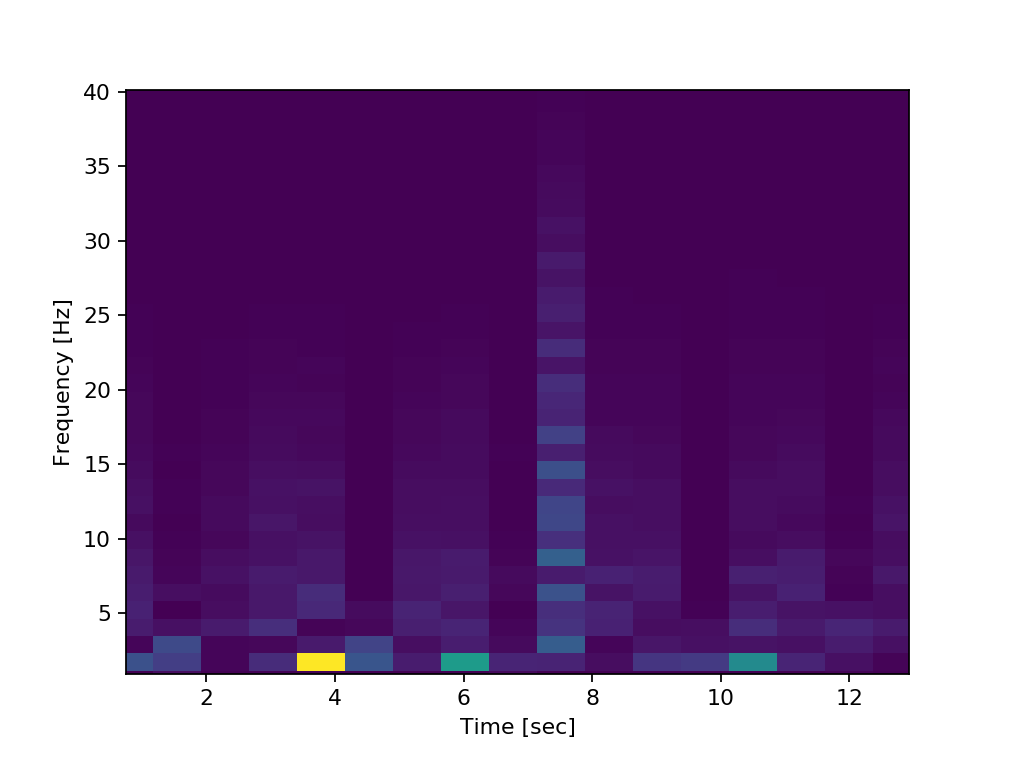

Text(0.5,0,'Time [sec]')

In [24]:
f, t, Sxx = spectrogram(xTrain[0,:], 300)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

<IPython.core.display.Javascript object>


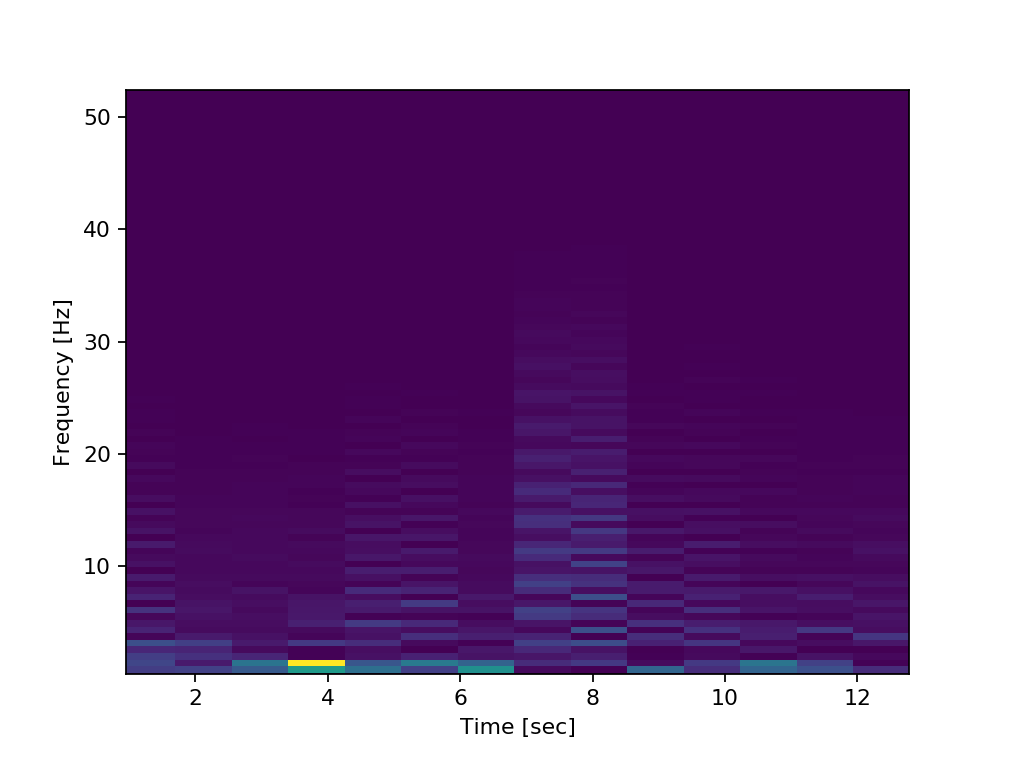

Text(0.5,0,'Time [sec]')

In [89]:
f, t, Sxx = spectrogram(xTrain[0,:], 300,nperseg=512,noverlap=256)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

<IPython.core.display.Javascript object>


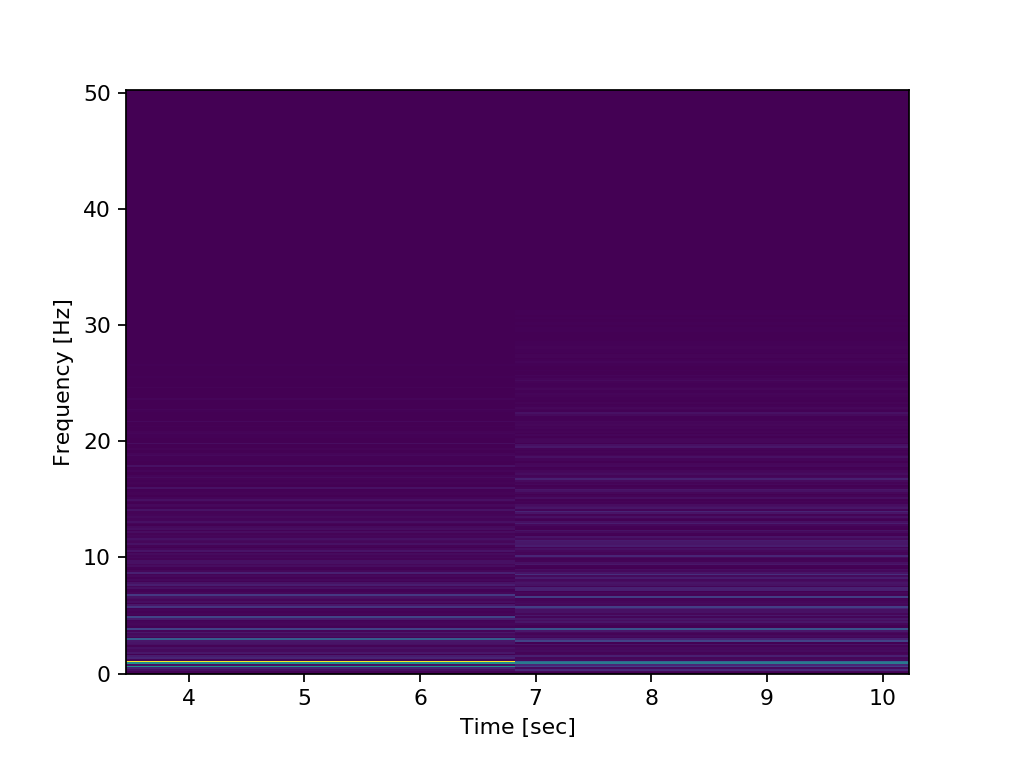

Text(0.5,0,'Time [sec]')

In [90]:
f, t, Sxx = spectrogram(xTrain[0,:], 300,nperseg=2048,noverlap=1024)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

<IPython.core.display.Javascript object>


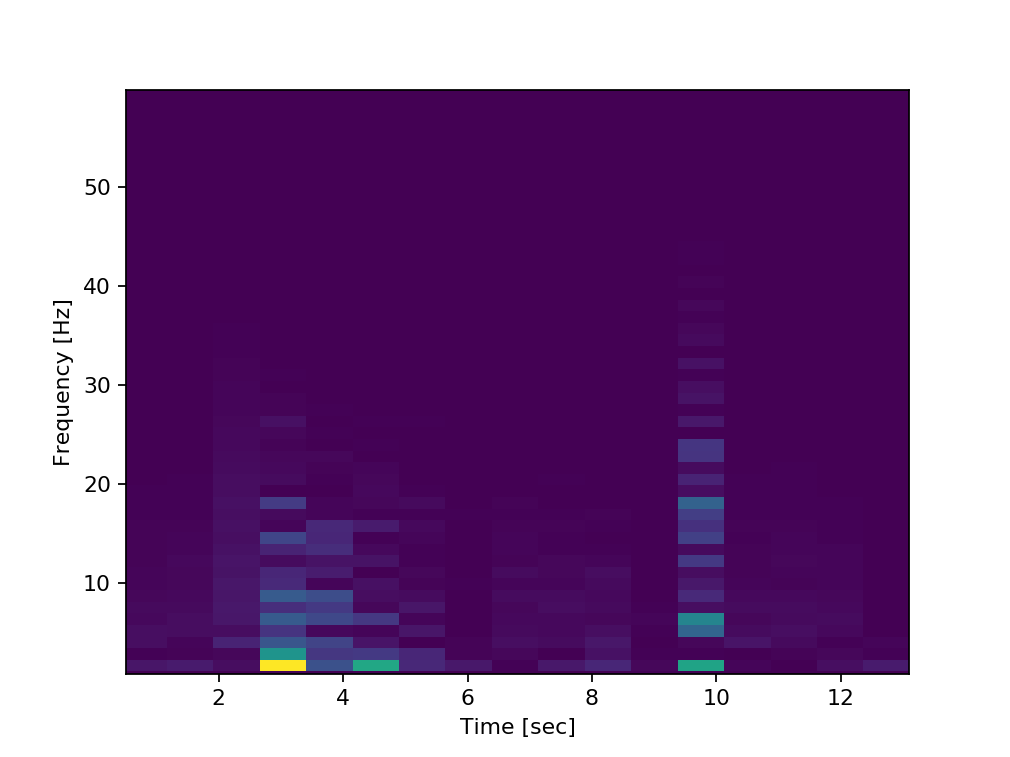

Text(0.5,0,'Time [sec]')

In [27]:
f, t, Sxx = spectrogram(xTrain[1,:], 300)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

<IPython.core.display.Javascript object>


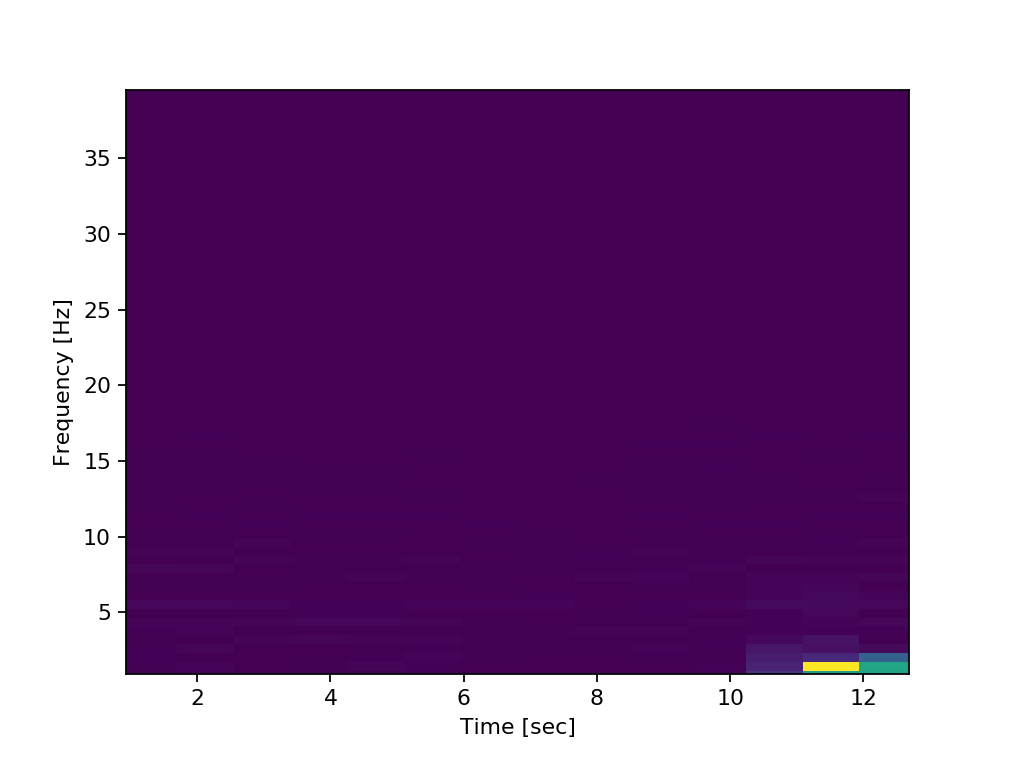

Text(0.5,0,'Time [sec]')

In [97]:
f, t, Sxx = spectrogram(xTrain[2,:], 300,nperseg=512,noverlap=256)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [94]:
df[df[0]=='A'].head()

,0
6,A
7,A
8,A
9,A
10,A


<IPython.core.display.Javascript object>


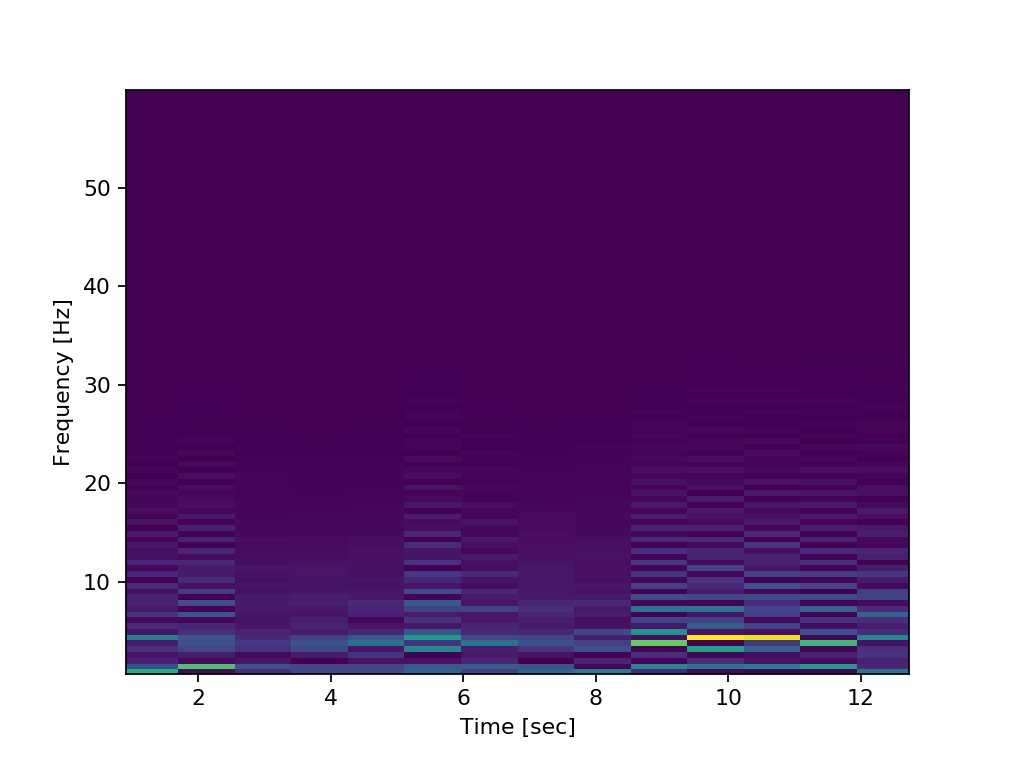

Text(0.5,0,'Time [sec]')

In [99]:
f, t, Sxx = spectrogram(xTrain[6,:], 300,nperseg=512,noverlap=256)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

<IPython.core.display.Javascript object>


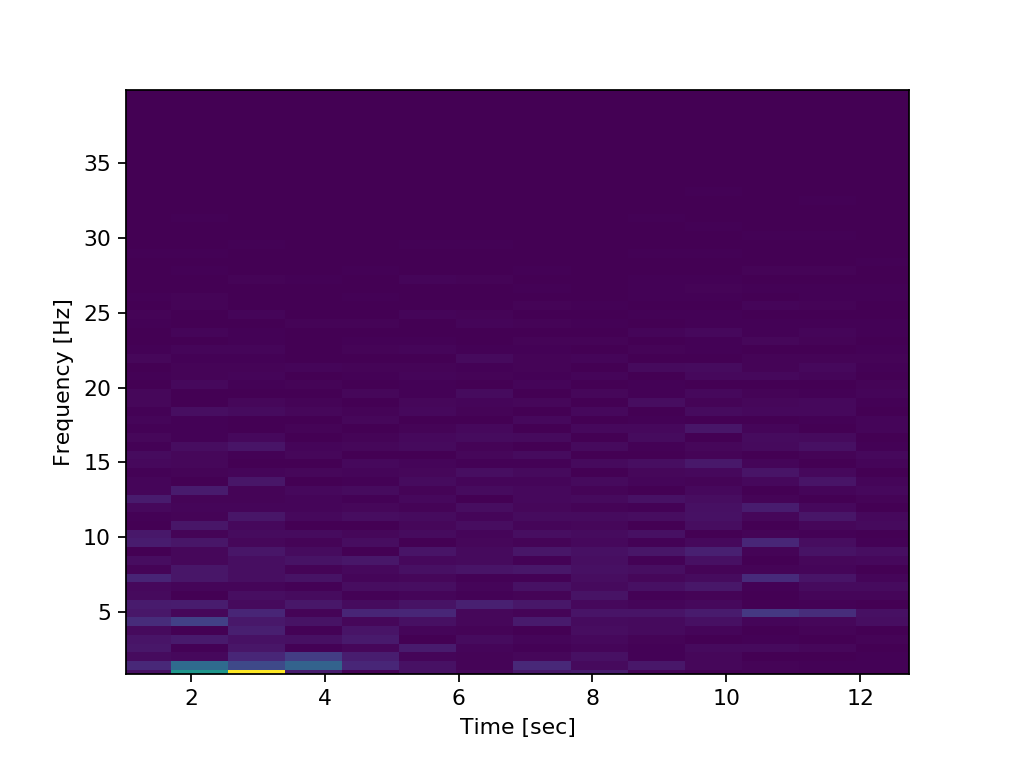

Text(0.5,0,'Time [sec]')

In [100]:
f, t, Sxx = spectrogram(xTrain[8,:], 300,nperseg=512,noverlap=256)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [101]:
df[df[0]=='~'].head()

,0
33,~
34,~
49,~
50,~
72,~


<IPython.core.display.Javascript object>


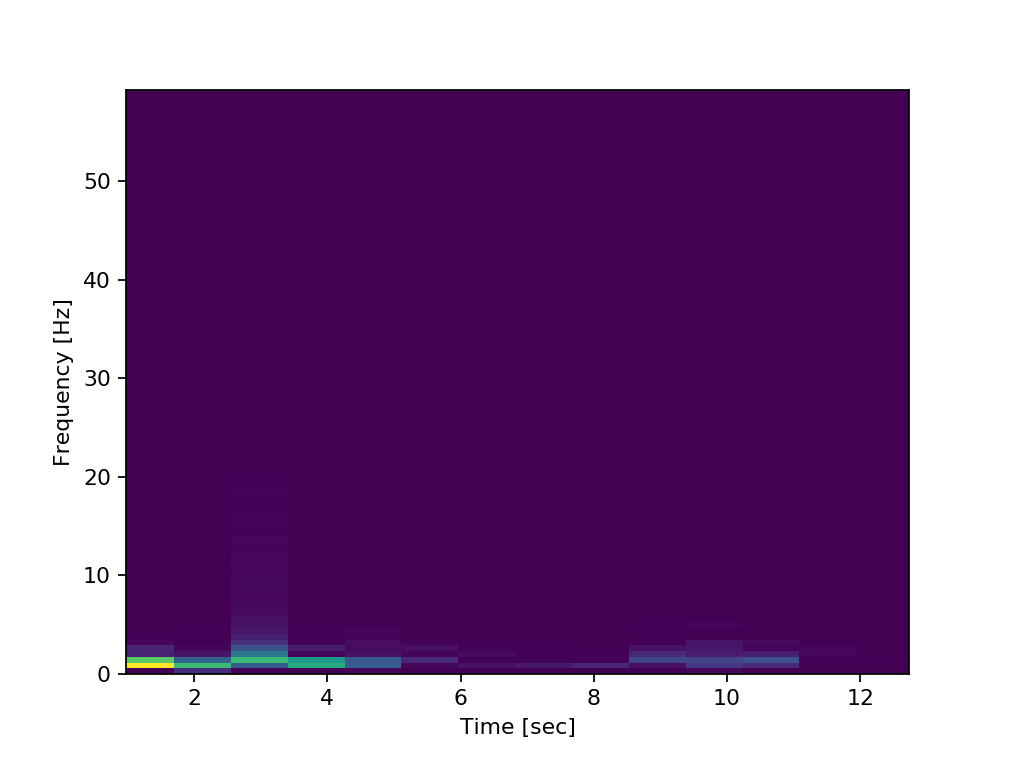

Text(0.5,0,'Time [sec]')

In [104]:
f, t, Sxx = spectrogram(xTrain[33,:], 300,nperseg=512,noverlap=256)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

<IPython.core.display.Javascript object>


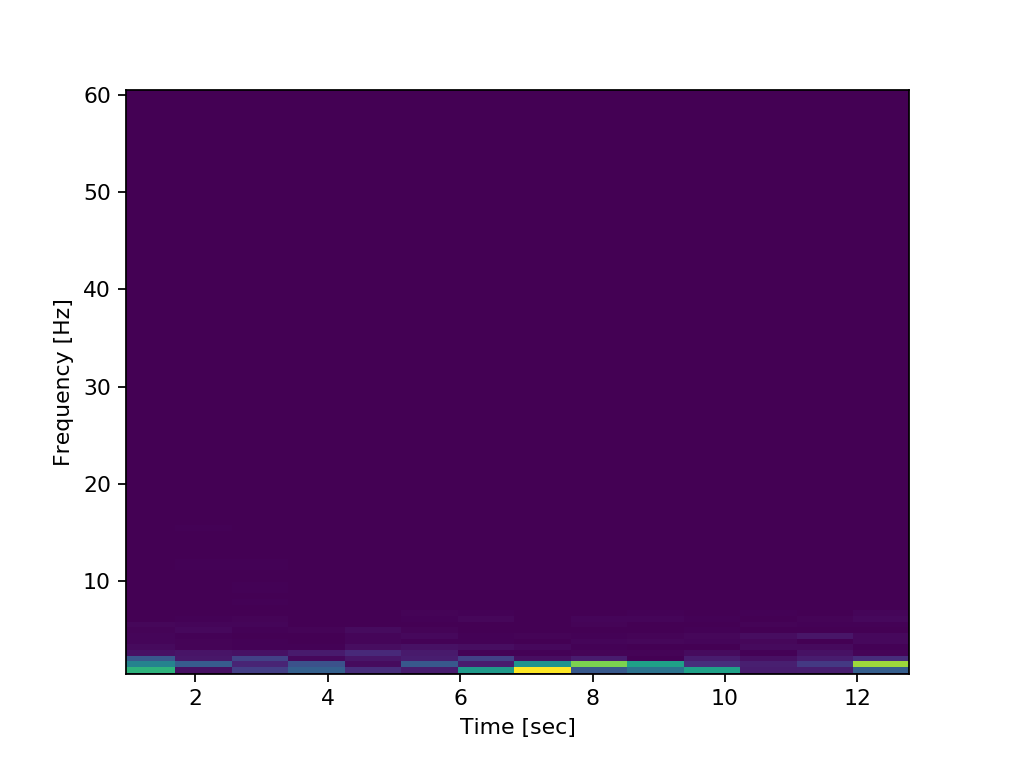

Text(0.5,0,'Time [sec]')

In [105]:
f, t, Sxx = spectrogram(xTrain[72,:], 300,nperseg=512,noverlap=256)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [165]:
sig=xTrain[0,:]
f, t, Sxx = stft(sig,300,window='boxcar',nperseg=512,noverlap=256,boundary=None)

In [166]:
Sxx.shape

(257, 15)

In [167]:
Sxx[61:,:]=0
t,x = istft(Sxx,300,window='boxcar',nperseg=512,noverlap=256,boundary=None)

<IPython.core.display.Javascript object>


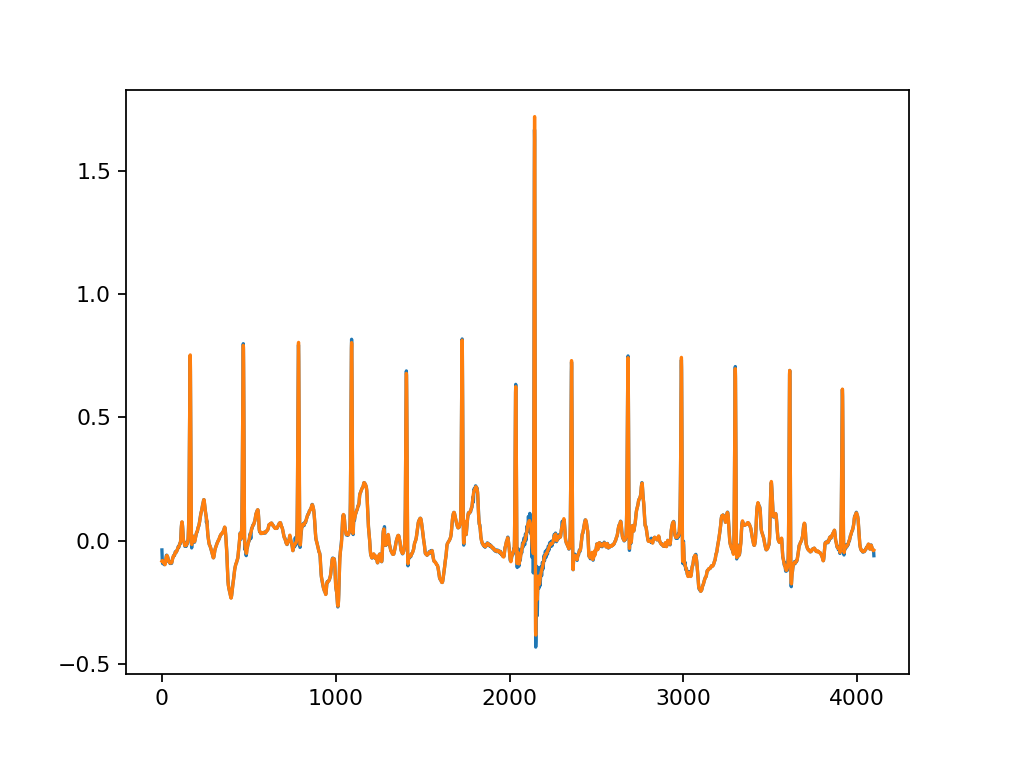

In [168]:
plt.plot(x)
plt.plot(sig)

In [160]:
f[:60]

array([ 0.       ,  0.5859375,  1.171875 ,  1.7578125,  2.34375  ,
        2.9296875,  3.515625 ,  4.1015625,  4.6875   ,  5.2734375,
        5.859375 ,  6.4453125,  7.03125  ,  7.6171875,  8.203125 ,
        8.7890625,  9.375    ,  9.9609375, 10.546875 , 11.1328125,
       11.71875  , 12.3046875, 12.890625 , 13.4765625, 14.0625   ,
       14.6484375, 15.234375 , 15.8203125, 16.40625  , 16.9921875,
       17.578125 , 18.1640625, 18.75     , 19.3359375, 19.921875 ,
       20.5078125, 21.09375  , 21.6796875, 22.265625 , 22.8515625,
       23.4375   , 24.0234375, 24.609375 , 25.1953125, 25.78125  ,
       26.3671875, 26.953125 , 27.5390625, 28.125    , 28.7109375,
       29.296875 , 29.8828125, 30.46875  , 31.0546875, 31.640625 ,
       32.2265625, 32.8125   , 33.3984375, 33.984375 , 34.5703125])

In [169]:
sig=xTrain[33,:]
f, t, Sxx = stft(sig,300,window='boxcar',nperseg=512,noverlap=256,boundary=None)

In [170]:
Sxx.shape

(257, 15)

In [171]:
Sxx[61:,:]=0
t,x = istft(Sxx,300,window='boxcar',nperseg=512,noverlap=256,boundary=None)

<IPython.core.display.Javascript object>


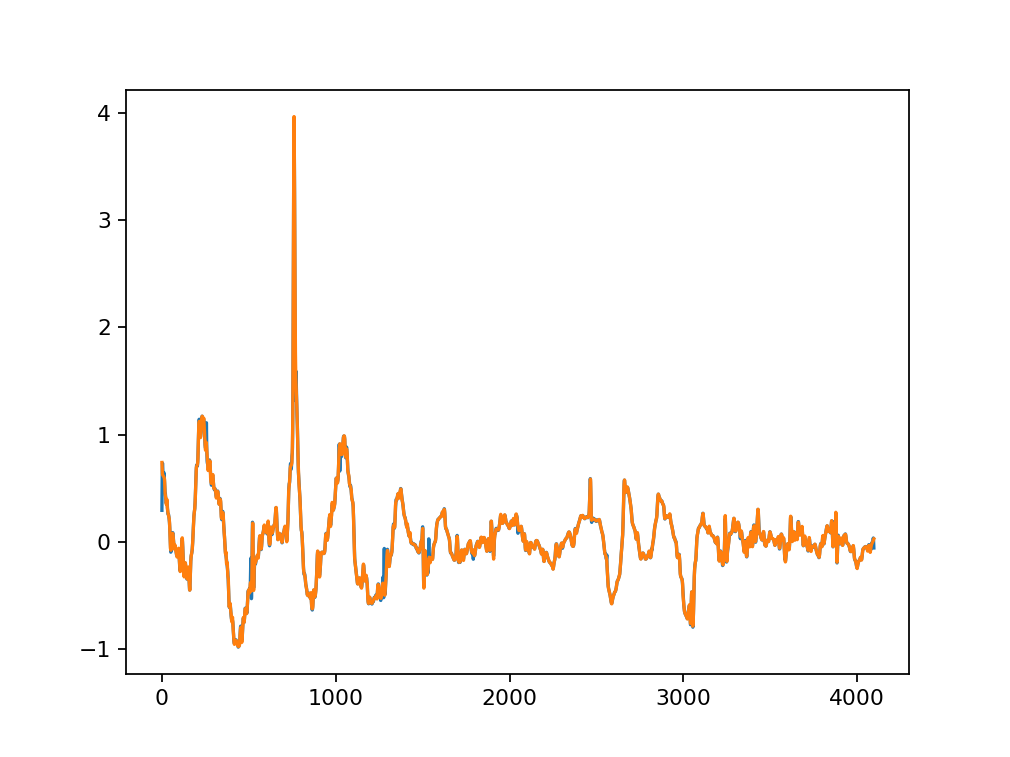

In [172]:
plt.plot(x)
plt.plot(sig)

In [173]:
sig=xTrain[7,:]
f, t, Sxx = stft(sig,300,window='boxcar',nperseg=512,noverlap=256,boundary=None)

In [174]:
Sxx.shape

(257, 15)

In [175]:
Sxx[61:,:]=0
t,x = istft(Sxx,300,window='boxcar',nperseg=512,noverlap=256,boundary=None)

<IPython.core.display.Javascript object>


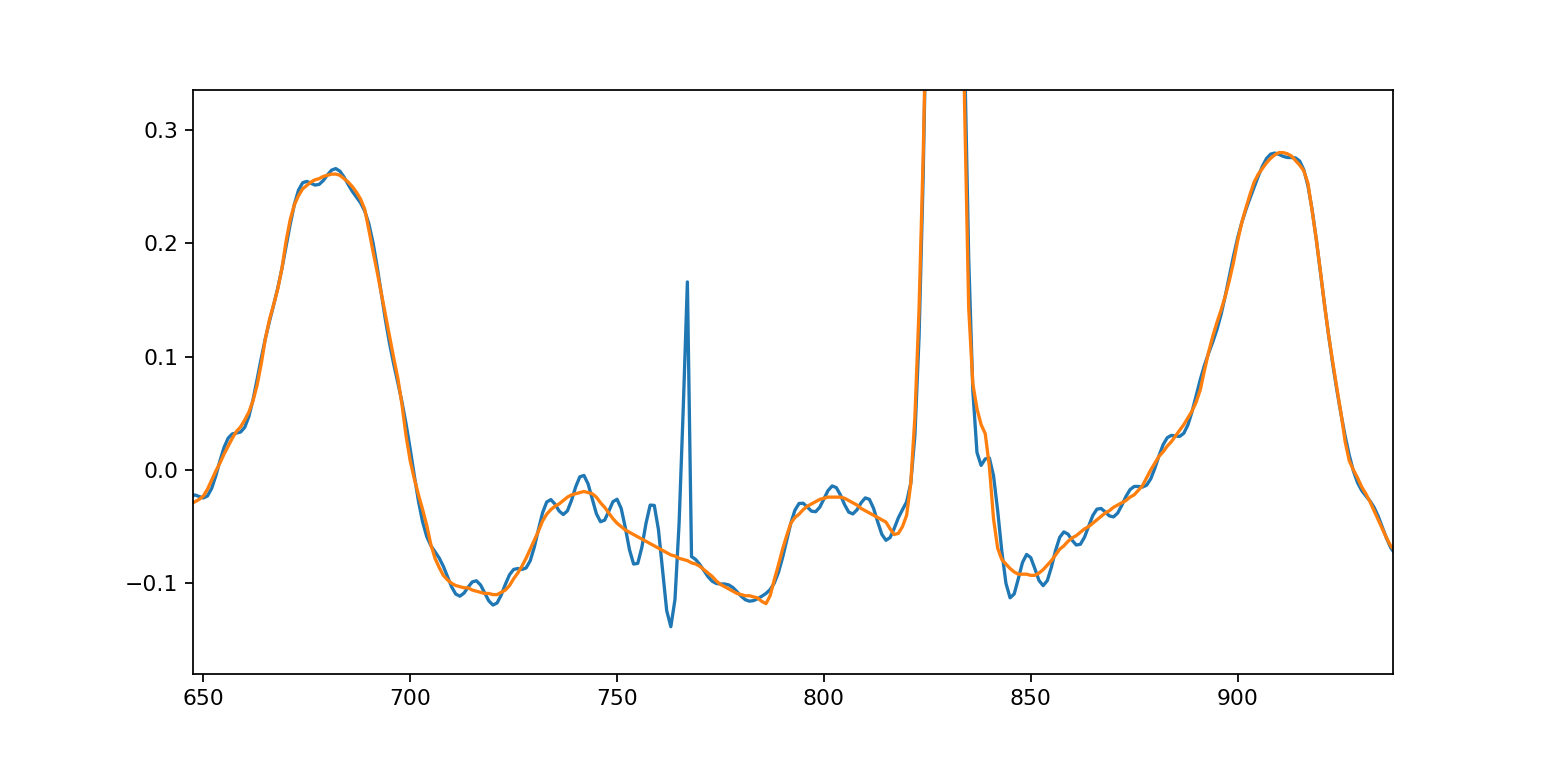

In [176]:
plt.plot(x)
plt.plot(sig)

## vectorize

In [208]:
xVal = np.load(dirName + 'valid.npy')
xTest = np.load(dirName + 'test.npy')

In [214]:
f, t, Sxx = stft(xTest,300,window='boxcar',nperseg=512,noverlap=256,boundary=None)
Sxx=np.abs(Sxx)

In [215]:
Sxx.shape

(2547, 257, 15)

In [216]:
Sxx = np.swapaxes(Sxx,1,2)

In [217]:
Sxx.shape

(2547, 15, 257)

In [218]:
np.save('data/fftTest',Sxx)